In [3]:
import pennylane as qml

In [4]:
li2 =qml.data.load("qchem", molname="Li2", bondlength=2.1, basis="STO-3G")

In [6]:
li2[0].molecule.alpha

[tensor([16.11957475,  2.93620066,  0.79465049], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([16.11957475,  2.93620066,  0.79465049], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False)]

In [7]:
li =qml.data.load("qchem", molname="LiH", bondlength=2.1, basis="STO-3G")
li[0].molecule.alpha

[tensor([16.11957475,  2.93620066,  0.79465049], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([0.63628975, 0.14786005, 0.04808868], requires_grad=False),
 tensor([3.42525091, 0.62391373, 0.1688554 ], requires_grad=False)]

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np

def potential_energy_surface(symbols, bond_lengths):
    """Calculates the molecular energy over various bond lengths (AKA the 
    potential energy surface) using the Hartree Fock method.
    
    Args:
        symbols (list(string)): 
            A list of atomic symbols that comprise the diatomic molecule of interest.
        bond_lengths (numpy.tensor): Bond lengths to calculate the energy over.

        
    Returns:
        hf_energies (numpy.tensor): 
            The Hartree Fock energies at every bond length value.
    """


    hf_energies = []

    # Put your code here #

    return np.array(hf_energies)


def ground_energy(hf_energies):
    """Finds the minimum energy of a molecule given its potential energy surface.
    
    Args: 
        hf_energies (numpy.tensor): 

    Returns:
        (float): The minumum energy in units of hartrees.
    """

    ind = np.argmin(hf_energies)
    return hf_energies[ind]

def reaction():
    """Calculates the energy of the reactants, the activation energy, and the energy of 
    the products in that order.

    Returns:
        (numpy.tensor): [E_reactants, E_activation, E_products]
    """
    molecules = {
        "H2": 
            {"symbols": ["H", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(0.5, 9.3, 0.3)}, 
        "Li2": 
            {"symbols": ["Li", "Li"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(3.5, 8.3, 0.3)}, 
        "LiH": 
            {"symbols": ["Li", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(2.0, 6.6, 0.3)}
    }


    for molecule in molecules.keys():
        # Put your code here #
        # populate each molecule's E0 and E_dissociation values
        hf_energies  
    # Calculate the following and don't forget to balance the chemical reaction!
    E_reactants = molecules["H2"]["E0"] + molecules["Li2"]["E0"]
    E_activation = E_reactants + molecules["H2"]["E_dissociation"] + molecules["Li2"]["E_dissociation"]
    E_products = molecules["LiH"]["E0"]

    return np.array([E_reactants, E_activation, E_products])


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    output = reaction().tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-3)


Raniy days ar the forest retreat

In [60]:
import json
import pennylane as qml
import pennylane.numpy as np

def U():
    """
    Creates the gate that checks the parity of the number of forests.
    It should not return anything, you simply need to add the gates.
    """


    # Put your code here #
    Uni = np.array([
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ])
    qml.CNOT([0, 8])
    qml.CNOT([0, 9])
    for i in range(0, 7):
        qml.CNOT([i, i+1])
        qml.ControlledQubitUnitary(Uni , control_wires=[i+1], wires=[8,9])
        qml.CNOT([i, i+1])

# These functions are responsible for testing the solution.


def run(test_case_input: str) -> str:

    input = json.loads(test_case_input)
    wires_input = [0,1,2,3,4,5,6,7]

    dev = qml.device("default.qubit", wires = 10, shots = 10)

    @qml.qnode(dev)
    def circuit():
      qml.BasisEmbedding(input, wires = wires_input)

      U()

      return qml.probs(wires = 8)

    return str(float(circuit()[1]))


def check(have: str, want: str) -> None:

    assert np.isclose(float(have), float(want)), "Wrong answer!"


# These are the public test cases
test_cases = [
    ('[1,0,1,1,0,1,1,1]', '1'),
    ('[0,0,0,0,0,1,0,1]', '0')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1,0,1,1,0,1,1,1]'...
Correct!
Running test case 1 with input '[0,0,0,0,0,1,0,1]'...
Correct!


In [6]:
import pennylane as qml
from pennylane import numpy as np

In [55]:
dev = qml.device("default.qubit", wires = 10, shots = 10)
@qml.qnode(dev)
def circuit(code):
    qml.BasisEmbedding(code, wires = range(8))
    Uni = np.array([
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ])
    qml.CNOT([0, 8])
    qml.CNOT([0, 9])
    for i in range(0, 7):
        qml.CNOT([i, i+1])
        qml.ControlledQubitUnitary(Uni , control_wires=[i+1], wires=[8,9])
        qml.CNOT([i, i+1])
    return qml.probs([8])
    

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_18952\295076800.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


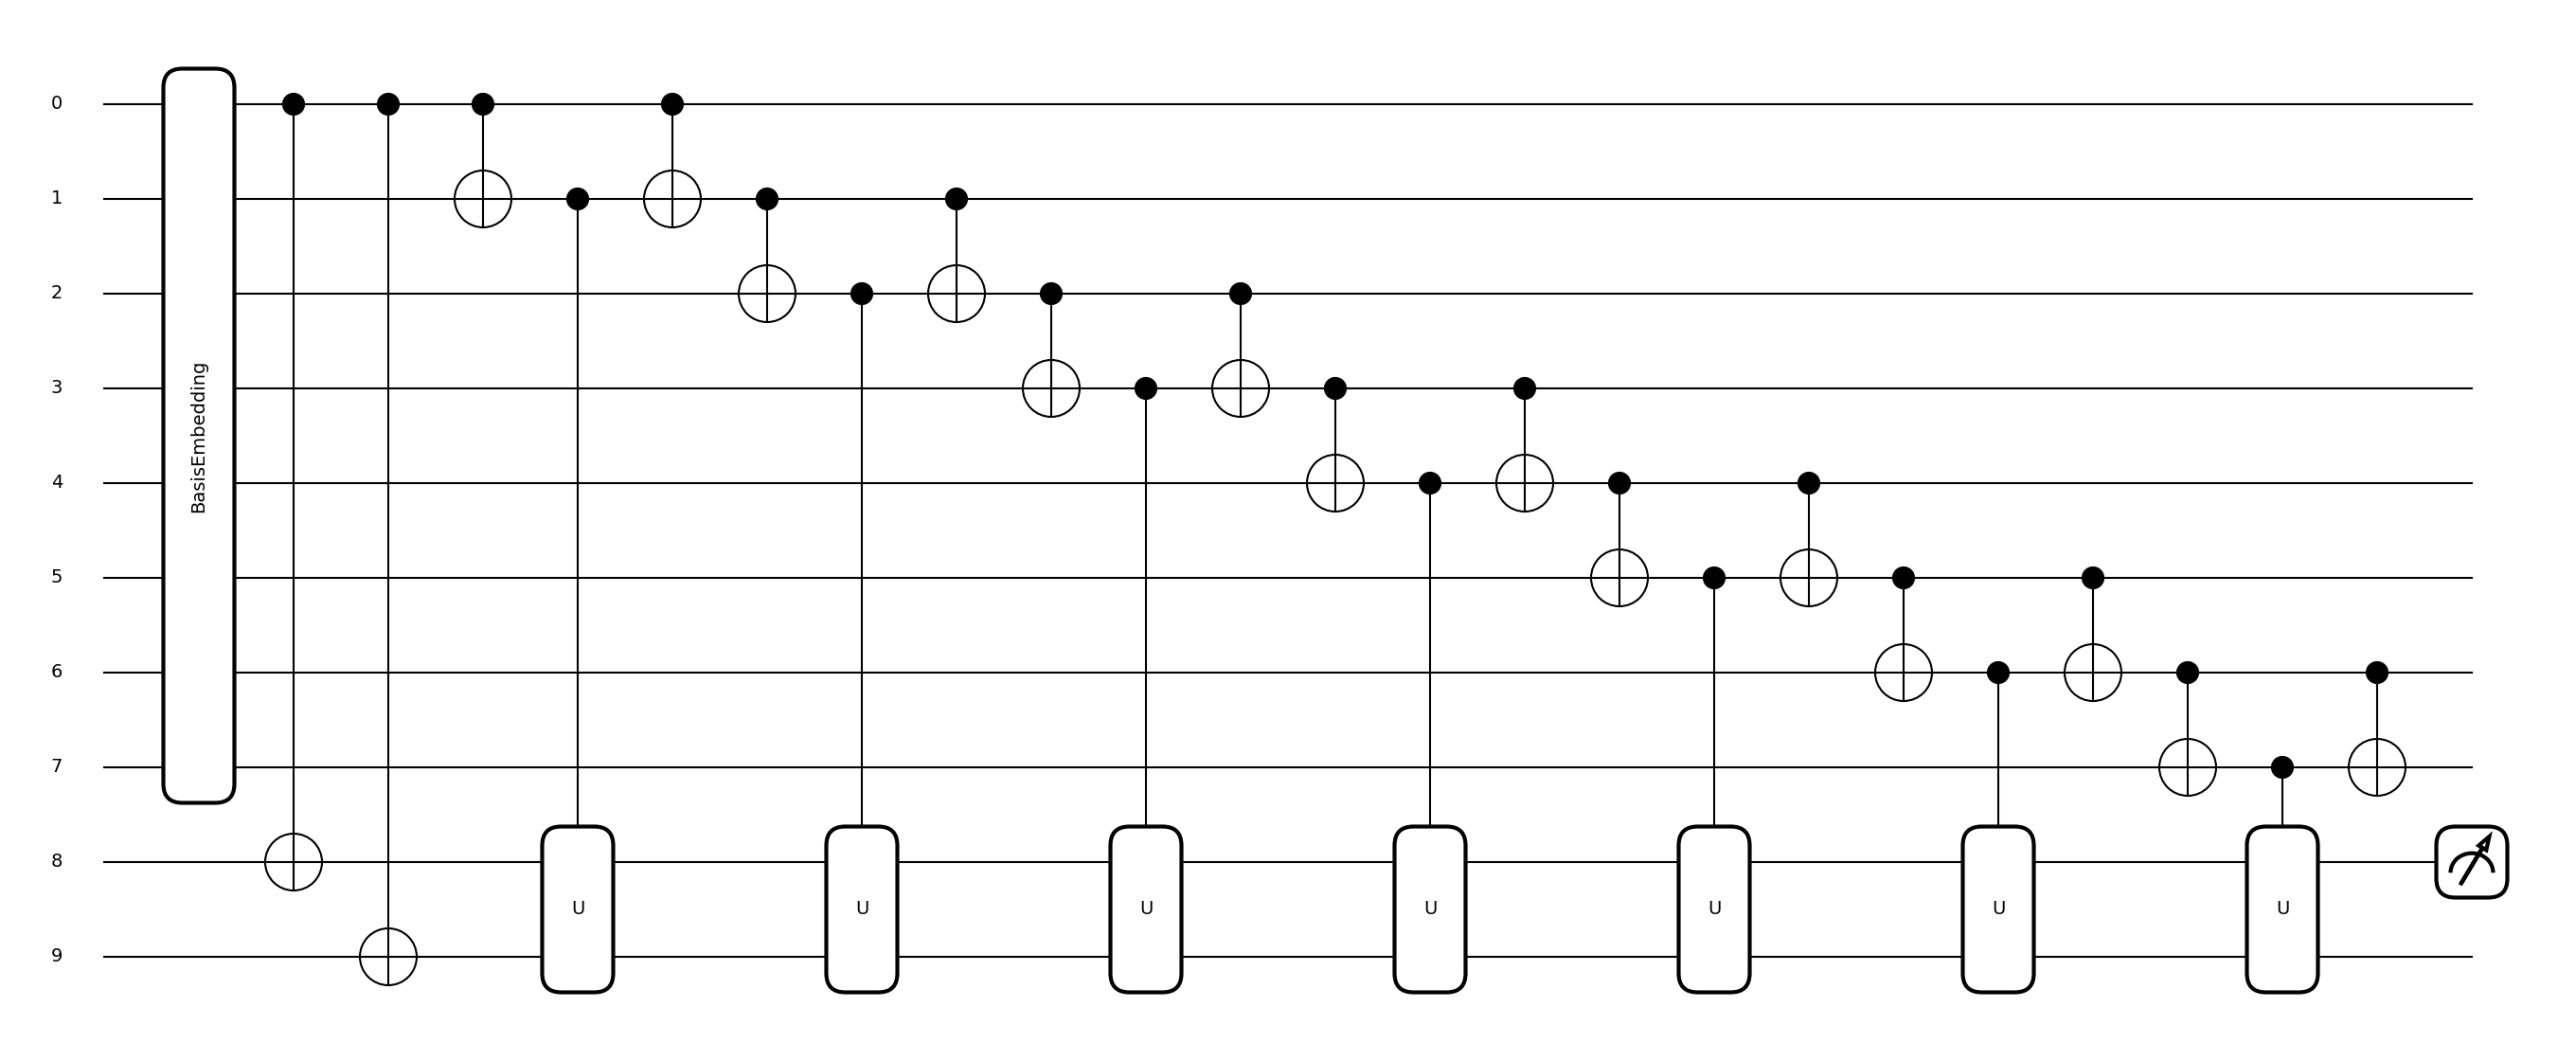

In [56]:
fig, ax = qml.draw_mpl(circuit)([1,0,1,1,0,1,1,1])
fig.show()

In [59]:
code = [1,0,1,1,0,1,1,1]
print(0 if circuit(code)[0] else 1)
count = 0
for i in range(7):
    if code[i] != code[i+1]:
        count +=1
print(count)


1
4


In [ ]:
[1,0,1,1,0,1,1,1] # error

In [1]:
import pennylane as qml
from pennylane import numpy as np

In [2]:
half_pi = np.pi / 2

dev_2qubit = qml.device('default.qubit', wires=[0,1])

@qml.qnode(dev_2qubit)
def prepare_phi1():
    qml.RY(half_pi, wires=[1])

    return qml.state()

@qml.qnode(dev_2qubit)
def prepare_psi_state():
    op_psi = qml.Identity(wires=[0]) @ qml.RY(half_pi, wires=[1])
    #op_psi = qml.prod(qml.CNOT(wires), qml.Identity(wires[0]) @ qml.RY(half_pi, wires[1]))
    print(qml.matrix(op_psi))
    print()
    qml.QubitUnitary(qml.matrix(op_psi), wires=[0,1])

    return qml.state()

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_20736\1641180159.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


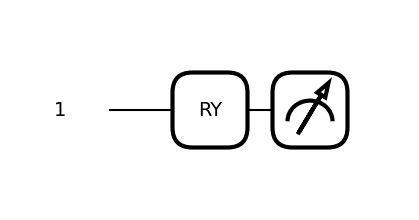

In [3]:
fig, ax = qml.draw_mpl(prepare_phi1)()
fig.show()

[[ 0.70710678+0.j -0.70710678-0.j  0.        +0.j  0.        -0.j]
 [ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        -0.j  0.70710678+0.j -0.70710678-0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]]



C:\Users\qwqwh\AppData\Local\Temp\ipykernel_20736\3944036551.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


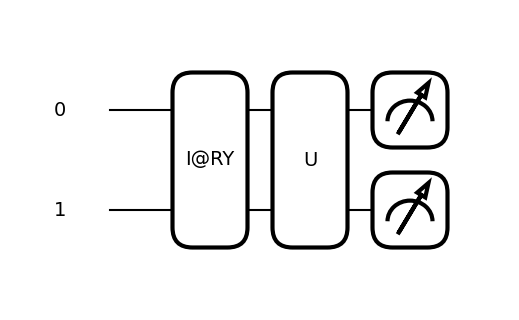

In [4]:
fig, ax = qml.draw_mpl(prepare_psi_state)()
fig.show()

In [8]:
import json
import pennylane as qml
import pennylane.numpy as np

def potential_energy_surface(symbols, bond_lengths):
    """Calculates the molecular energy over various bond lengths (AKA the 
    potential energy surface) using the Hartree Fock method.
    
    Args:
        symbols (list(string)): 
            A list of atomic symbols that comprise the diatomic molecule of interest.
        bond_lengths (numpy.tensor): Bond lengths to calculate the energy over.

        
    Returns:
        hf_energies (numpy.tensor): 
            The Hartree Fock energies at every bond length value.
    """


    big_d = bond_lengths.max()
    geometry = np.array([[0., 0., 0], [0., 0., big_d]], requires_grad = False)
    mol = qml.qchem.Molecule(symbols, geometry)
    E_dis = qml.qchem.hf_energy(mol)()
    hf_energies = [E_dis]
    for d in bond_lengths:
        geometry = np.array([[0., 0., 0], [0., 0., d]], requires_grad = False)

        mol = qml.qchem.Molecule(symbols, geometry)
        hf_e = qml.qchem.hf_energy(mol)()
        hf_energies.append(hf_e)

    return np.array(hf_energies)


def ground_energy(hf_energies):
    """Finds the minimum energy of a molecule given its potential energy surface.
    
    Args: 
        hf_energies (numpy.tensor): 

    Returns:
        (float): The minumum energy in units of hartrees.
    """

    ind = np.argmin(hf_energies)
    return hf_energies[ind]

def reaction():
    """Calculates the energy of the reactants, the activation energy, and the energy of 
    the products in that order.

    Returns:
        (numpy.tensor): [E_reactants, E_activation, E_products]
    """
    molecules = {
        "H2": 
            {"symbols": ["H", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(0.5, 9.3, 0.3)}, 
        "Li2": 
            {"symbols": ["Li", "Li"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(3.5, 8.3, 0.3)}, 
        "LiH": 
            {"symbols": ["Li", "H"], "E0": 0, "E_dissociation": 0, "bond lengths": np.arange(2.0, 6.6, 0.3)}
    }


    for molecule in molecules.keys():
        # Put your code here #
        # populate each molecule's E0 and E_dissociation values

        hf_energies = potential_energy_surface(molecules[molecule]["symbols"], molecules[molecule]["bond lengths"])
        molecules[molecule]["E0"] = ground_energy(hf_energies)
        molecules[molecule]["E_dissociation"] = hf_energies[0]
    # Calculate the following and don't forget to balance the chemical reaction!
    E_reactants = molecules["H2"]["E0"] + molecules["Li2"]["E0"]
    E_activation = E_reactants + molecules["H2"]["E_dissociation"] + molecules["Li2"]["E_dissociation"]
    E_products = molecules["LiH"]["E0"]

    return np.array([E_reactants, E_activation, E_products])


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    output = reaction().tolist()
    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)

    assert np.allclose(solution_output, expected_output, rtol=1e-3)


In [9]:
reaction()

tensor([-15.7553572 , -30.86135809,  -7.86326723], requires_grad=True)

In [1]:
# MAthematician sort

In [21]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires = 5)

@qml.qnode(dev)
def circuit():
    """
    Circuit in which you will prepare the Bell state with the allowed gates.
    """


    # Put your code here #
    qml.Hadamard(0)
    
    qml.QFT(wires=[2, 1, 0])
    qml.QFT(wires=[2, 1, 0])
    qml.QFT(wires=[4, 3, 2])
    qml.QFT(wires=[4, 3, 2])


    return qml.probs(wires = range(5))


# These functions are responsible for testing the solution

def run(case: str) -> str:
    return "No output"

def check(have: str, want: str) -> None:

    assert np.isclose(circuit()[0], 0.5), "The state is not correct"
    assert np.isclose(circuit()[-1], 0.5), "The state is not correct"

    for op in circuit.tape.operations:
      assert (isinstance(op, qml.Hadamard) or isinstance(op, qml.T) or isinstance(op, qml.QFT)), f"You can only use Hadamard, T and QFT operators. You are using {op.name}"
      if isinstance(op, qml.QFT):
        assert len(op.wires) == 3, "QFT must act on 3 wires"


# These are the public test cases
test_cases = [
    ('No input', 'No output')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
Correct!


C:\Users\qwqwh\AppData\Local\Temp\ipykernel_19192\3872578603.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


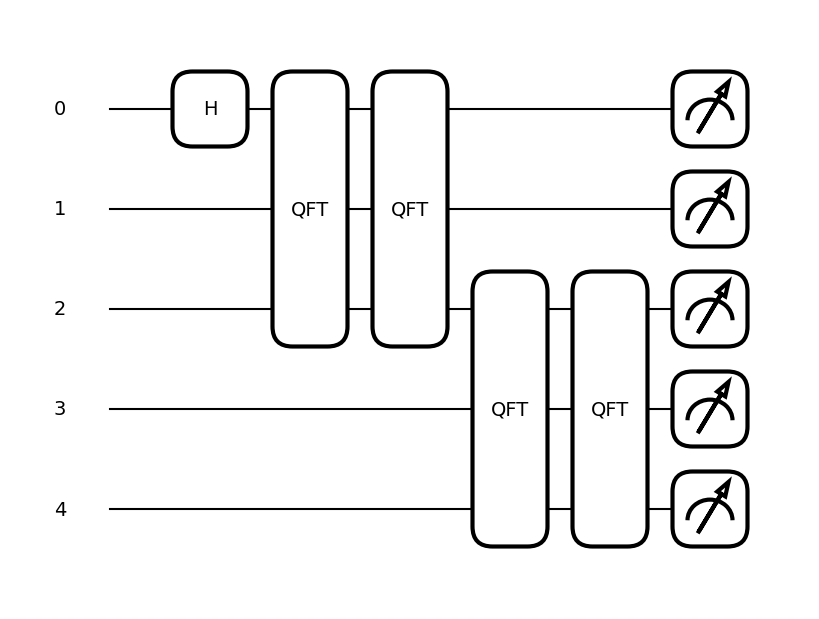

In [22]:
fig, ax = qml.draw_mpl(circuit)()
fig.show()

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_19192\149575434.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


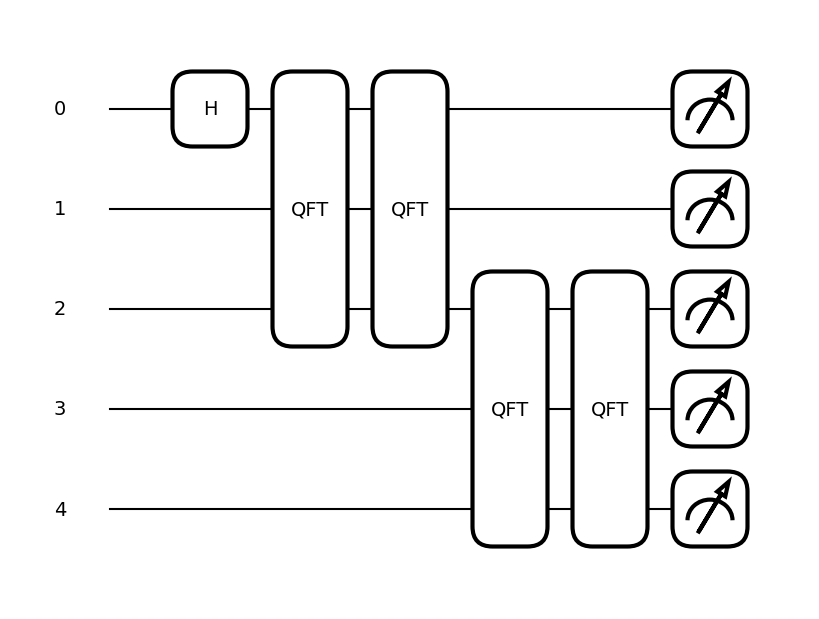

In [23]:
fig, ax = qml.draw_mpl(circuit, expansion_strategy='device')()
fig.show()

In [24]:
circuit()

tensor([5.00000000e-01, 2.33037523e-32, 1.29518789e-32, 1.08092818e-31,
        1.25185446e-32, 3.83741541e-32, 1.60333668e-32, 8.54535116e-31,
        6.10519792e-32, 7.94684065e-62, 2.73472351e-62, 9.70522988e-61,
        1.51929084e-62, 2.40807598e-61, 4.49710088e-62, 1.11703937e-30,
        2.61926472e-32, 1.71679865e-62, 7.90980793e-63, 2.44036091e-61,
        1.55727311e-63, 4.02991895e-62, 1.31513613e-62, 2.55185718e-31,
        1.21140994e-31, 5.70075264e-32, 1.92592994e-32, 5.20771457e-31,
        5.00741786e-33, 8.10816507e-32, 1.56000325e-32, 5.00000000e-01], requires_grad=True)

In [25]:
from matplotlib import pyplot as plt

<StemContainer object of 3 artists>

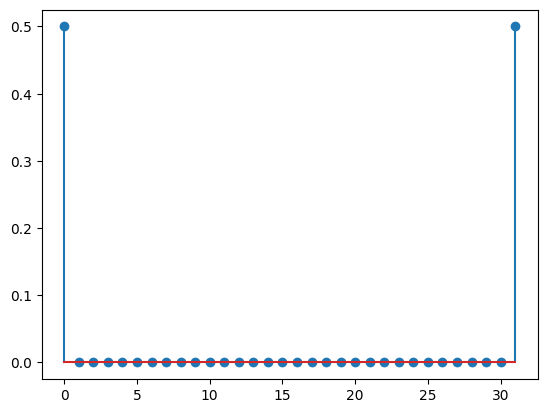

In [26]:
plt.stem(circuit())

In [27]:
# HHL


In [28]:
import json
import pennylane as qml
import pennylane.numpy as np




# Put any helper functions here that you want to make #


def encode_hermitian(A, wires):
    """
    Encodes a hermitian matrix A as a unitary U = e^{iA}.

    Args
        - A (numpy.tensor): a 2x2 matrix
        - b (numpy.tensor): a length-2 vector

    Returns
        - (qml.Operation): a unitary operation U = e^{iA}
    """
    return qml.exp(qml.Hermitian(A, wires=wires), coeff=1j)


def mint_to_lime(A, b):
    """
    Calculates the optimal mint and lime proportions in the Mojito HHLime twist.

    Args
        - A (numpy.tensor): a 2x2 matrix
        - b (numpy.tensor): a length-2 vector

    Returns
        - x (numpy.tensor): the solution to Ax = b
        (int): the number of operations in your HHL circuit.
    """
    b_qubits = 1
    b_wires = [0]

    qpe_qubits = 10
    qpe_wires = list(range(b_qubits, b_qubits + qpe_qubits))

    ancilla_qubits = 1
    ancilla_wires = list(
        range(b_qubits + qpe_qubits, ancilla_qubits + b_qubits + qpe_qubits)
    )

    all_wires = b_wires + qpe_wires + ancilla_wires
    dev = qml.device("default.qubit", wires=all_wires)

    @qml.qnode(dev)
    def HHL(A, b):
        """
        Implements the HHL algorithm.
        Args
            - A (numpy.tensor): a 2x2 matrix
            - b (numpy.tensor): a length-2 vector

        Returns
            - (numpy.tensor):
                The probability distribution for the vector x, which is the
                solution to Ax = b.
        """


        # Put your code here #
        qml.Hadamard(qpe_wires[0])

        return qml.probs(wires=b_wires)

    # we return probs, but we need the state itself (it will be real-valued)
    x = np.sqrt(HHL(A, b))

    return x, len(HHL.tape._ops)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    A, b = json.loads(test_case_input)
    output, num_ops = mint_to_lime(np.array(A), np.array(b))
    output = output.tolist()
    output.append(num_ops)
    return str(output)


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    output = solution_output[:-1]
    num_ops = solution_output[-1]
    expected_output = json.loads(expected_output)

    assert num_ops > 4, "Your circuit should have a few more operations!"
    assert np.allclose(output, expected_output, rtol=1e-2)


# These are the public test cases
test_cases = [
    ('[[[1, -0.333333], [-0.333333, 1]], [0.48063554, 0.87692045]]', '[0.6123100731658992, 0.7906177169127275]'),
    ('[[[0.456, -0.123], [-0.123, 0.123]], [0.96549299, 0.26042903]]', '[0.5090526763759141, 0.8607353673888718]')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[[1, -0.333333], [-0.333333, 1]], [0.48063554, 0.87692045]]'...


AssertionError: Your circuit should have a few more operations!

In [ ]:
import json
import pennylane as qml
import pennylane.numpy as np


# Put any helper functions here that you want to make #
def get_eigenvalues(A):
    alpha = A[0,0]+A[1, 1]
    beta = np.sqrt(alpha**2 - 4*(A[0,0]*A[1, 1] - A[0, 1]*A[1, 0]))
    return 0.5*np.array([alpha-beta, alpha+beta])

def get_ry_angles(n_clock):
    return [2*np.arcsin(1/(2**i)) for i in range(n_clock)]
def prepare_b(b, b_wire):
    p_0 = b[0]
    angle = np.arccos(p_0)*2
    qml.RX(angle, b_wire)
#------------------------------------------------------------------
def encode_hermitian(A, wires):
    """
    Encodes a hermitian matrix A as a unitary U = e^{iA}.

    Args
        - A (numpy.tensor): a 2x2 matrix
        - b (numpy.tensor): a length-2 vector

    Returns
        - (qml.Operation): a unitary operation U = e^{iA}
    """
    return qml.exp(qml.Hermitian(A, wires=wires), coeff=1j)


def mint_to_lime(A, b):
    """
    Calculates the optimal mint and lime proportions in the Mojito HHLime twist.

    Args
        - A (numpy.tensor): a 2x2 matrix
        - b (numpy.tensor): a length-2 vector

    Returns
        - x (numpy.tensor): the solution to Ax = b
        (int): the number of operations in your HHL circuit.
    """
    b_qubits = 1
    b_wires = [0]

    qpe_qubits = 10
    qpe_wires = list(range(b_qubits, b_qubits + qpe_qubits))

    ancilla_qubits = 1
    ancilla_wires = list(
        range(b_qubits + qpe_qubits, ancilla_qubits + b_qubits + qpe_qubits)
    )

    all_wires = b_wires + qpe_wires + ancilla_wires
    dev = qml.device("default.qubit", wires=all_wires)

    @qml.qnode(dev)
    def HHL(A, b):
        """
        Implements the HHL algorithm.
        Args
            - A (numpy.tensor): a 2x2 matrix
            - b (numpy.tensor): a length-2 vector

        Returns
            - (numpy.tensor):
                The probability distribution for the vector x, which is the
                solution to Ax = b.
        """


        # Put your code here #
        N = 2**2
        e1, e2 = get_eigenvalues(A)
        t = (2*np.pi)/(e1 * N)
        ry_angles = get_ry_angles(qpe_qubits)
        
        # get U 
        # Encoding b state
        prepare_b(b, b_wires)
        # QPE   - Hadamard
        for i in qpe_wires:
            qml.Hadamard(i)
        #       - C evolution
        for i in range(len(qpe_wires)):
            qml.ctrl(encode_hermitian(t*A*(2**(i)), wires=b_wires), control=qpe_wires[i])
        
        #       - IQFT
        qml.adjoint(qml.QFT(qpe_wires))
        
        # Rotate RY
        for i, ry_i in enumerate(ry_angles):
            qml.CRY(ry_i, [qpe_wires[i], ancilla_wires[0]])
        
        # measurement
        #qml.measure(ancilla_wires)
        qml.Barrier(all_wires)
        # IQPE  - QFT
        qml.QFT(qpe_wires)
        #       - inverse C-evolution
        for i in reversed(range(len(qpe_wires))):
            qml.adjoint(qml.ctrl(encode_hermitian(t*A*(2**(i)), wires=b_wires), control=qpe_wires[i]))
        
        #for i, u in enumerate(reversed(Us)):
        #    qml.adjoint(qml.ControlledQubitUnitary(u, control_wires=qpe_wires[-(i+1)], wires=b_wires))
        
        #       - Hadamard
        for i in qpe_wires:
            qml.Hadamard(i)

        return qml.probs(wires=b_wires)

    # we return probs, but we need the state itself (it will be real-valued)
    x = np.sqrt(HHL(A, b))

    return x, len(HHL.tape._ops)


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    A, b = json.loads(test_case_input)
    output, num_ops = mint_to_lime(np.array(A), np.array(b))
    output = output.tolist()
    output.append(num_ops)
    return str(output)


def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    output = solution_output[:-1]
    num_ops = solution_output[-1]
    expected_output = json.loads(expected_output)

    assert num_ops > 4, "Your circuit should have a few more operations!"
    #assert np.allclose(output, expected_output, rtol=1e-2), f"{output} \n{expected_output}"
    return not np.allclose(output, expected_output, rtol=1e-2)

# These are the public test cases
test_cases = [
    ('[[[1, -0.333333], [-0.333333, 1]], [0.48063554, 0.87692045]]', '[0.6123100731658992, 0.7906177169127275]'),
    ('[[[0.456, -0.123], [-0.123, 0.123]], [0.96549299, 0.26042903]]', '[0.5090526763759141, 0.8607353673888718]')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

: 

In [178]:
A  = np.array([[0.456, -0.123], [-0.123, 0.123]])
b = np.array([0.48063554, 0.87692045])

mint_to_lime(A, b)
#qml.draw_mpl(circuit)(A, b)

(tensor([0.55426971, 0.83233712], requires_grad=True), 55)

In [179]:
get_eigenvalues(A)

tensor([0.08249457, 0.49650543], requires_grad=True)

In [181]:
0.49650543/0.08249457

6.018643772553757

In [184]:
a1, a2 = 0.21426971, 0.83233712

In [198]:
k = 0
for i in range(1, 20):
    n_p =  i*(a2/a1)
    eps = (n_p - int(n_p)) 
    print(eps)
    if eps < 0.1:
        k = i
        break
k

0.8845300159317899
0.7690600318635799
0.6535900477953689
0.5381200637271597
0.4226500796589505
0.3071800955907378
0.1917101115225286
0.0762401274543194


8

In [185]:
t = 
a2/a1

3.88453001593179

In [194]:
n_p = 8*(a2/a1)
n_p - int(n_p)

0.0762401274543194

In [180]:
np.linalg.eigvals(A)

tensor([0.49650543, 0.08249457], requires_grad=True)

In [148]:
b[1]**2

tensor(0.76898948, requires_grad=True)

In [166]:
b_qubits = 1
b_wires = [0]

qpe_qubits = 10 #10
qpe_wires = list(range(b_qubits, b_qubits + qpe_qubits))

ancilla_qubits = 1
ancilla_wires = list(
        range(b_qubits + qpe_qubits, ancilla_qubits + b_qubits + qpe_qubits)
    )

all_wires = b_wires + qpe_wires + ancilla_wires

In [167]:
ancilla_wires

[11]

In [172]:
dev = qml.device("default.qubit", wires=all_wires)

@qml.qnode(dev)
def HHL(A, b):
        """
        Implements the HHL algorithm.
        Args
            - A (numpy.tensor): a 2x2 matrix
            - b (numpy.tensor): a length-2 vector

        Returns
            - (numpy.tensor):
                The probability distribution for the vector x, which is the
                solution to Ax = b.
        """


        # Put your code here #
        N = 2**2
        e1, e2 = get_eigenvalues(A)
        t = (2*np.pi)/(e1 * N)
        ry_angles = get_ry_angles(qpe_qubits)
        
        # get U 
        #U = encode_hermitian(t*A, wires=b_wires)
        #Us = [U]
        #for i in range(len(qpe_wires)-1):
        #    u = Us[i]
        #    Us.append(u@u)
        # Encoding b state
        prepare_b(b, b_wires)
        # QPE   - Hadamard
        for i in qpe_wires:
            qml.Hadamard(i)
        #       - C evolution
        for i in range(len(qpe_wires)):
            print(i+1)
            qml.ctrl(encode_hermitian(t*A*(2**(i)), wires=b_wires), control=qpe_wires[i])
        
        #       - IQFT
        qml.adjoint(qml.QFT(qpe_wires))
        
        # Rotate RY
        for i, ry_i in enumerate(ry_angles):
            qml.CRY(ry_i, [qpe_wires[i], ancilla_wires[0]])
        
        # measurement
        qml.measure(ancilla_wires)
        qml.Barrier(all_wires)
        # IQPE  - QFT
        qml.QFT(qpe_wires)
        #       - inverse C-evolution
        for i in reversed(range(len(qpe_wires))):
            qml.adjoint(qml.ctrl(encode_hermitian(t*A*(2**(i)), wires=b_wires), control=qpe_wires[i]))
        
        #for i, u in enumerate(reversed(Us)):
        #    qml.adjoint(qml.ControlledQubitUnitary(u, control_wires=qpe_wires[-(i+1)], wires=b_wires))
        
        #       - Hadamard
        for i in qpe_wires:
            qml.Hadamard(i)

        return qml.probs(wires=b_wires)

In [173]:
A

tensor([[ 1.      , -0.333333],
        [-0.333333,  1.      ]], requires_grad=True)

In [174]:
sqrt_p = HHL(A, b)
print(sqrt_p)
print(np.sqrt(sqrt_p))

1
2
3
4
5
6
7
8
9
10
[0.41690543 0.58309457]
[0.64568215 0.76360629]


c:\Users\qwqwh\Documents\GitHub\personal_study\.conda\Lib\site-packages\pennylane\drawer\mpldrawer.py:581: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from current font.
  bbox = text_obj.get_window_extent(renderer)


(<Figure size 3900x1300 with 1 Axes>, <Axes: >)

c:\Users\qwqwh\Documents\GitHub\personal_study\.conda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from current font.
  func(*args, **kwargs)
c:\Users\qwqwh\Documents\GitHub\personal_study\.conda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 120023 (\N{MATHEMATICAL BOLD SCRIPT CAPITAL H}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


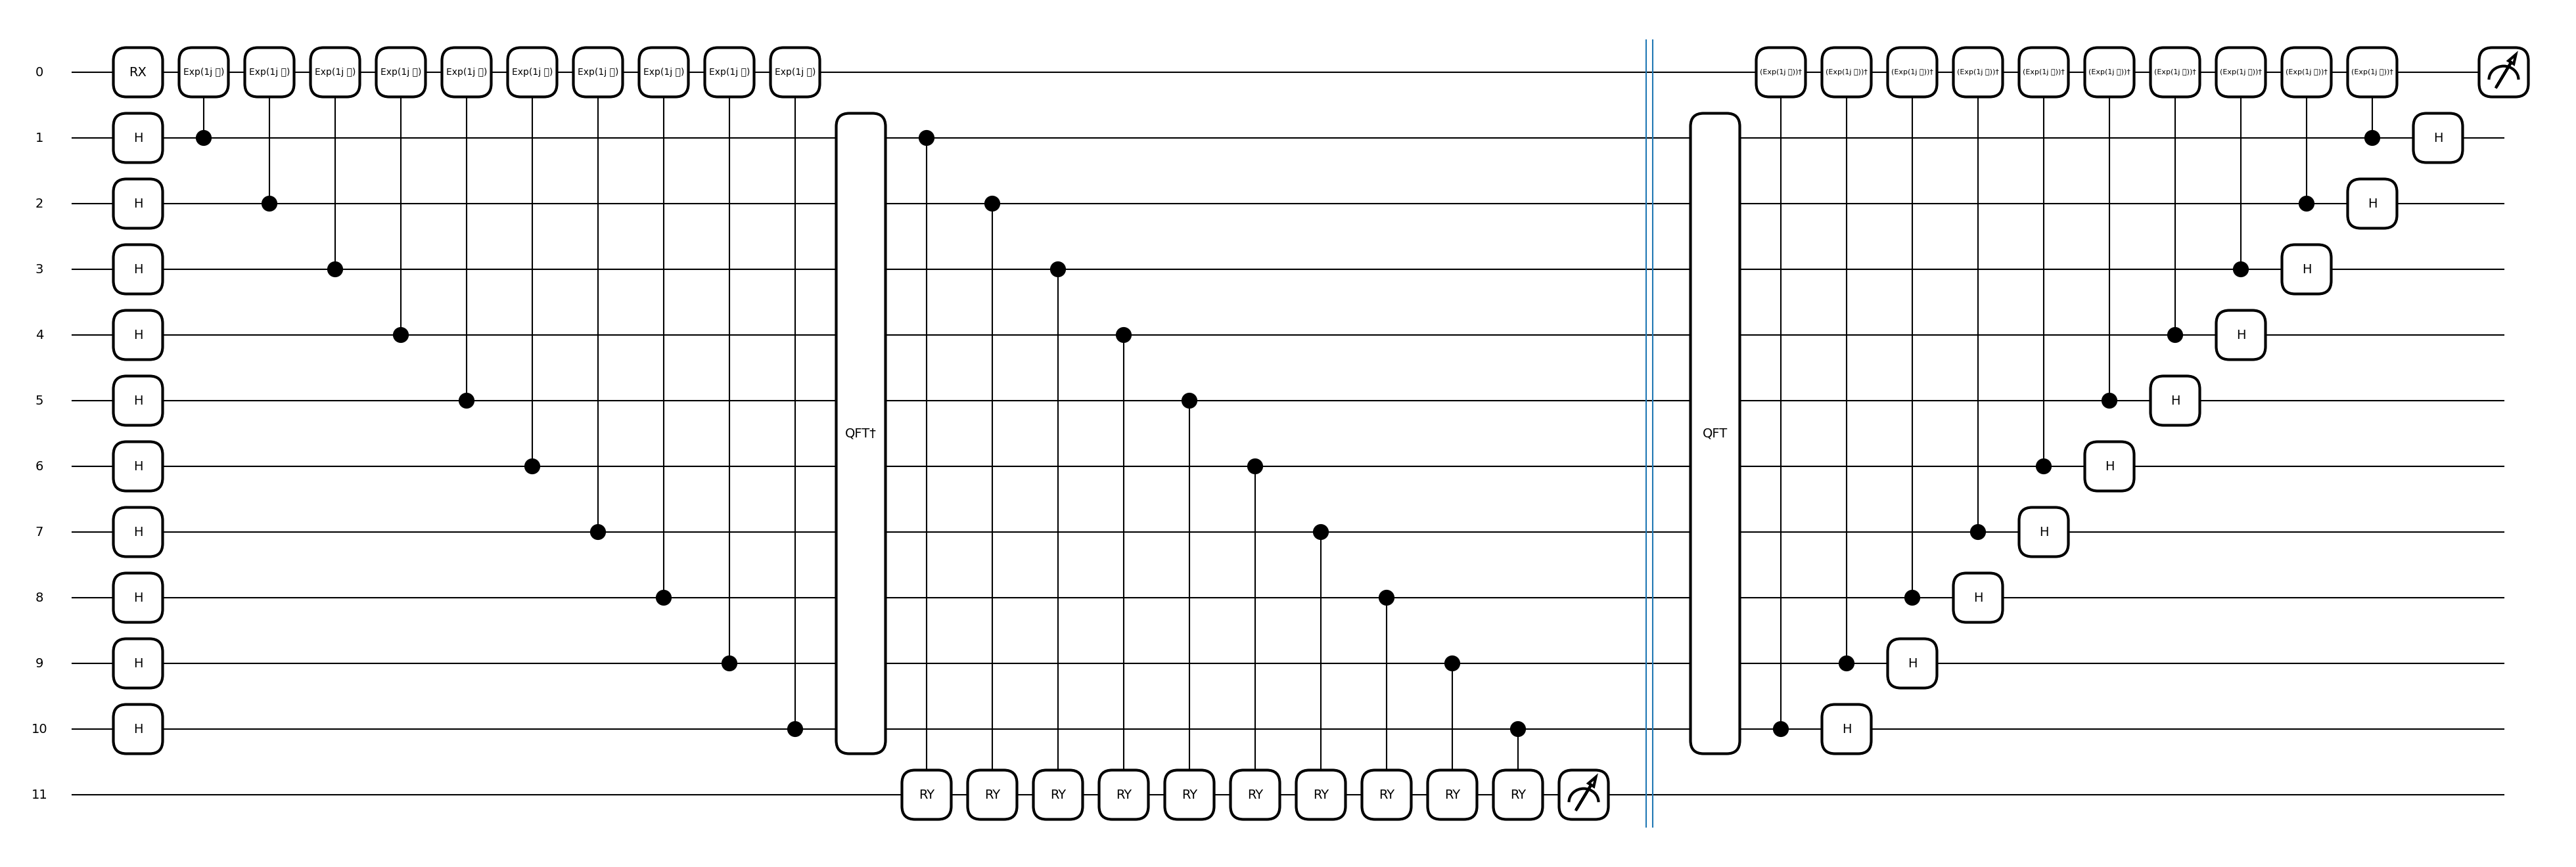

In [171]:
qml.draw_mpl(HHL)(A, b)